In [43]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import time
from spotipy import Spotify
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [44]:
CLIENT_ID = '' #developer.spotify.com clientID
CLIENT_SECRET = '' #developer.spotify.com clientSecret
REDIRECT_URI = '' #developer.spotify.com Redirect URIs

scope = ["user-library-read", "playlist-read-private"]

sp = Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID,
                                       client_secret=CLIENT_SECRET,
                                       redirect_uri=REDIRECT_URI,
                                       scope=scope),
             requests_timeout=30)
#"Print user information (for verification purposes)"
#user = sp.current_user()
#print(user["display_name"], "-", user["id"])


In [ ]:
#Token control 
token_info = sp.auth_manager.get_cached_token()
if token_info:
    access_token = token_info['access_token']
    print("Access Token:", access_token)
else:
    print("No token found.")


In [ ]:
playlist_id = "6W57V9nC35ul5GRg2J5y29"

def get_all_tracks(sp, playlist_id):
    tracks = []
    results = sp.playlist_tracks(playlist_id, limit=100, offset=0)
    tracks.extend(results['items'])
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

def get_audio_features(sp, track_ids):
    features = []
    for i in range(0, len(track_ids), 50):
        batch = track_ids[i:i+50]
        try:
            audio_features = sp.audio_features(batch)
            features.extend([f for f in audio_features if f is not None])
            time.sleep(0.2)
        except spotipy.exceptions.SpotifyException as e:
            print(f"API hatası: {e}")
            continue
    return features

tracks_data = get_all_tracks(sp, playlist_id)
track_ids = [item['track']['id'] for item in tracks_data if item['track']]

features_data = get_audio_features(sp, track_ids)

df_features = pd.DataFrame(features_data)

track_names = [item['track']['name'] for item in tracks_data if item['track']]
df_features['track_name'] = track_names

In [48]:
df_features

,track_name
0,Look Alive (feat. Drake)
1,God's Plan
2,Wow Freestyle (feat. Kendrick Lamar)
3,Bigger Than You (feat. Drake & Quavo)
4,Jumpman
...,...
345,FRIED
346,Sky
347,Rookie Of The Year
348,Livin' My Truth


In [ ]:
track_ids = []
for track_name in df_features['track_name']:
    results = sp.search(q=track_name, limit=1)
    track_id = results['tracks']['items'][0]['id']
    track_ids.append(track_id)

df_features['track_id'] = track_ids

# Print for check
print(df_features.head())


                              track_name                track_id
0               Look Alive (feat. Drake)  6HJ34Zyw6bg8yGm28AxLXf
1                             God's Plan  0VgkVdmE4gld66l8iyGjgx
2   Wow Freestyle (feat. Kendrick Lamar)  0gV5B7zmJkS1aaH9APokrH
3  Bigger Than You (feat. Drake & Quavo)  5S1IUPueD0xE0vj4zU3nSf
4                                Jumpman  27GmP9AWRs744SzKcpJsTZ


In [ ]:
kaggle_df  = pd.read_csv("/Users/ogulcan/Desktop/Spotify_Project/spotify_data.csv")
kaggle_df.head(5)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [15]:
def find_matching_songs_by_id(playlist_df, kaggle_df):
    matching_songs = pd.merge(playlist_df, kaggle_df, 
                            on='track_id', 
                            how='inner')

    print("First 5 matched songs:")
    print(matching_songs[['track_id']].head())
    print("\nTotal number of matched songs:", len(matching_songs))
    
    return matching_songs

matching_songs = find_matching_songs_by_id(df_features, kaggle_df)
matching_songs

Eşleşen şarkıların ilk 5 tanesi:
                 track_id
0  6HJ34Zyw6bg8yGm28AxLXf
1  0VgkVdmE4gld66l8iyGjgx
2  0gV5B7zmJkS1aaH9APokrH
3  5S1IUPueD0xE0vj4zU3nSf
4  27GmP9AWRs744SzKcpJsTZ

Toplam eşleşen şarkı sayısı: 211


,track_name_x,track_id,Unnamed: 0,artist_name,track_name_y,popularity,year,genre,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Look Alive (feat. Drake),6HJ34Zyw6bg8yGm28AxLXf,340920,BlocBoy JB,Look Alive (feat. Drake),72,2018,hip-hop,0.918,0.580,...,-7.501,1,0.3220,0.001080,0.000061,0.1060,0.611,139.977,181415,4
1,God's Plan,0VgkVdmE4gld66l8iyGjgx,284821,Future,Mask Off,81,2017,hip-hop,0.833,0.434,...,-8.795,1,0.4310,0.010200,0.021900,0.1650,0.281,150.062,204600,4
2,Wow Freestyle (feat. Kendrick Lamar),0gV5B7zmJkS1aaH9APokrH,340946,Jay Rock,Wow Freestyle (feat. Kendrick Lamar),68,2018,hip-hop,0.782,0.633,...,-4.644,1,0.3410,0.035500,0.000000,0.0615,0.749,150.055,175213,4
3,Bigger Than You (feat. Drake & Quavo),5S1IUPueD0xE0vj4zU3nSf,341228,2 Chainz,Bigger Than You (feat. Drake & Quavo),55,2018,hip-hop,0.888,0.515,...,-6.246,1,0.2710,0.247000,0.000000,0.4460,0.264,141.009,225893,4
4,Jumpman,27GmP9AWRs744SzKcpJsTZ,188817,Drake,Jumpman,70,2015,hip-hop,0.852,0.553,...,-7.286,1,0.1870,0.055900,0.000000,0.3320,0.656,142.079,205879,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Willing To Trust (with Ty Dolla $ign),1OFQT3lHGbnn3x9jPtagXk,560564,Kid Cudi,Willing To Trust (with Ty Dolla $ign),59,2022,hip-hop,0.601,0.738,...,-7.247,1,0.1800,0.011600,0.205000,0.3430,0.313,78.003,282053,4
207,Sky,29TPjc8wxfz4XMn21O7VsZ,452808,Playboi Carti,Sky,81,2020,hip-hop,0.785,0.903,...,-4.184,1,0.2100,0.258000,0.000000,0.1690,0.565,139.980,193234,4
208,Rookie Of The Year,7aVjnFsARHuTBZzkR6rYOR,506789,Moneybagg Yo,Rookie Of The Year,61,2021,hip-hop,0.881,0.529,...,-7.398,0,0.4220,0.000884,0.000167,0.1240,0.223,87.996,120110,4
209,Livin' My Truth,37Qn9foJ2E2S24guZSyvyg,560514,Kid Cudi,Livin' My Truth,59,2022,hip-hop,0.679,0.701,...,-6.638,1,0.0401,0.401000,0.058100,0.1380,0.935,80.988,133507,4


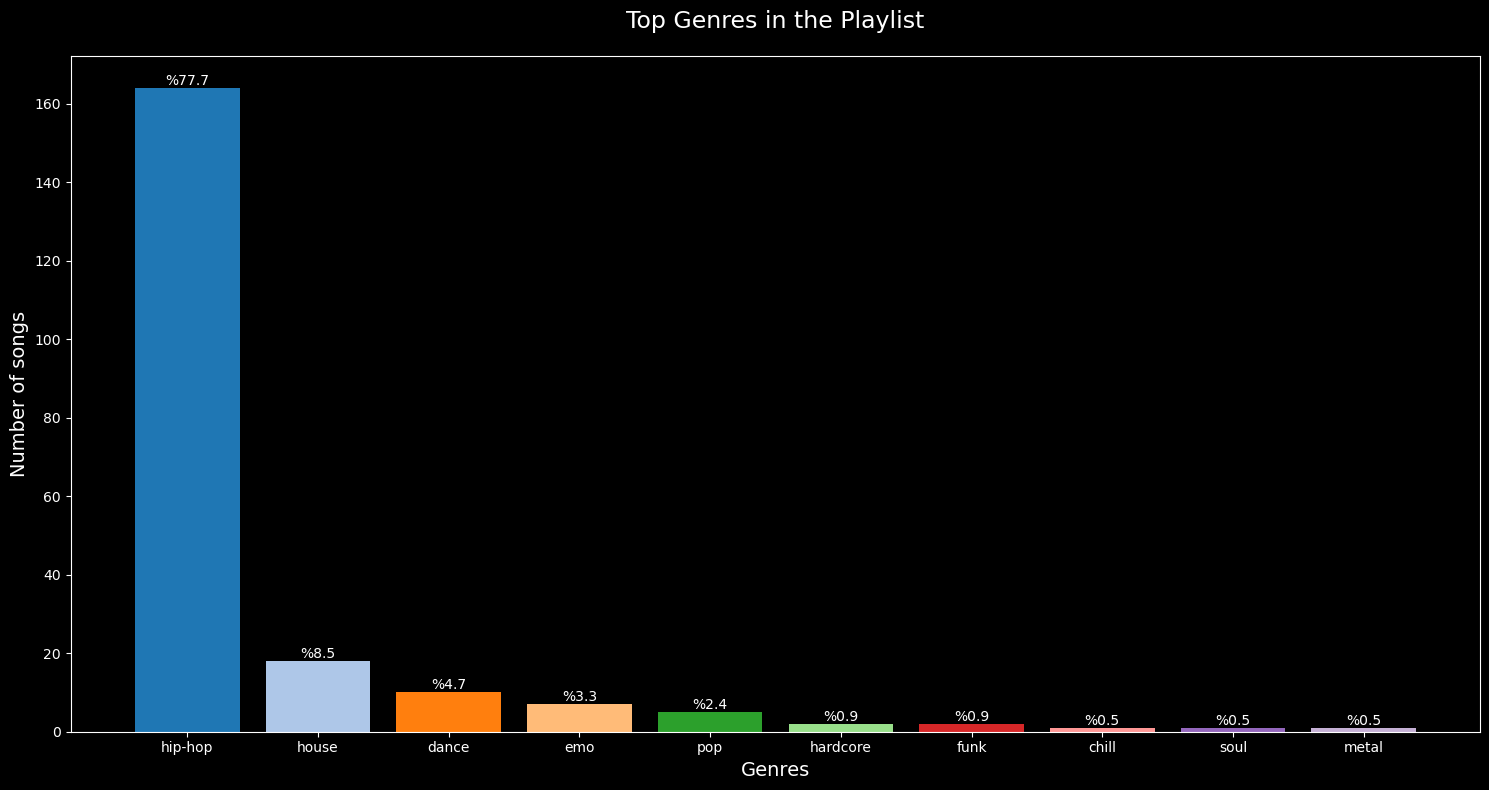

In [ ]:
genre_counts = matching_songs['genre'].value_counts()

plt.figure(figsize=(15, 8))
plt.bar(genre_counts.index, genre_counts.values, color=plt.cm.tab20.colors[:len(genre_counts)])

plt.title('Top Genres in the Playlist', fontsize=17, pad=20)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Number of songs', fontsize=14)

total = len(matching_songs)
for i, v in enumerate(genre_counts.values):
    plt.text(i, v, f'%{((v/total)*100):.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


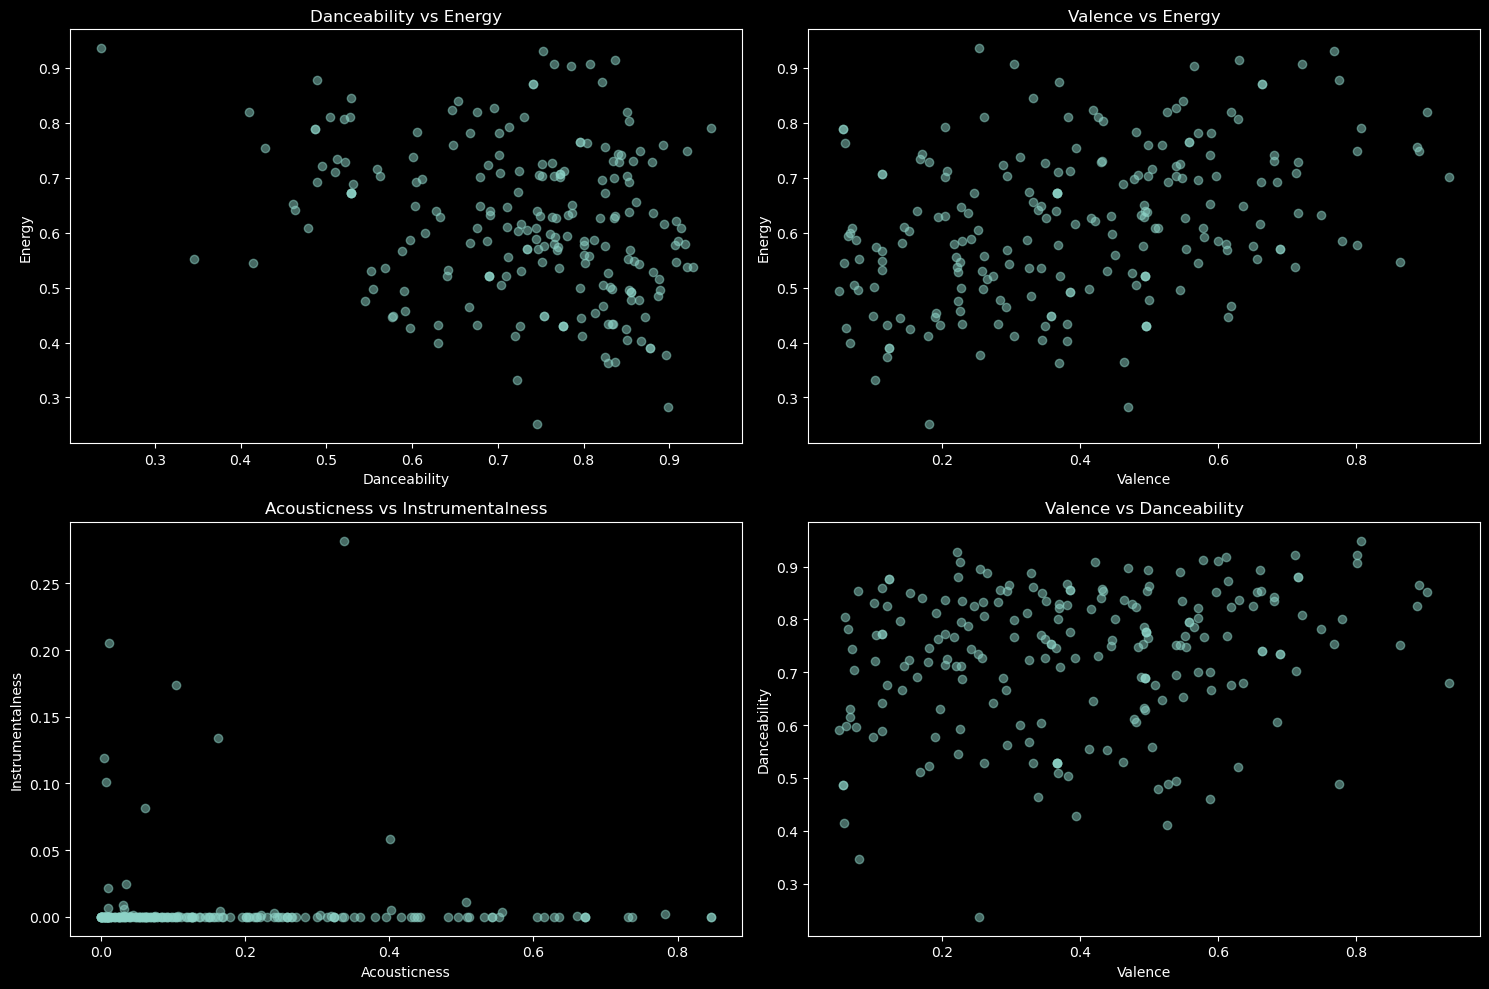


Özellikler arası korelasyon değerleri:
                  danceability    energy   valence  acousticness  \
danceability          1.000000 -0.249413  0.210430     -0.131326   
energy               -0.249413  1.000000  0.367404     -0.215898   
valence               0.210430  0.367404  1.000000      0.112668   
acousticness         -0.131326 -0.215898  0.112668      1.000000   
instrumentalness     -0.031286 -0.076010 -0.060264     -0.022690   

                  instrumentalness  
danceability             -0.031286  
energy                   -0.076010  
valence                  -0.060264  
acousticness             -0.022690  
instrumentalness          1.000000  


In [20]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(matching_songs['danceability'], 
           matching_songs['energy'], 
           alpha=0.5)
plt.title('Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')

plt.subplot(2, 2, 2)
plt.scatter(matching_songs['valence'], 
           matching_songs['energy'], 
           alpha=0.5)
plt.title('Valence vs Energy')
plt.xlabel('Valence')
plt.ylabel('Energy')

plt.subplot(2, 2, 3)
plt.scatter(matching_songs['acousticness'], 
           matching_songs['instrumentalness'], 
           alpha=0.5)
plt.title('Acousticness vs Instrumentalness')
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')

plt.subplot(2, 2, 4)
plt.scatter(matching_songs['valence'], 
           matching_songs['danceability'], 
           alpha=0.5)
plt.title('Valence vs Danceability')
plt.xlabel('Valence')
plt.ylabel('Danceability')

plt.tight_layout()
plt.show()

features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']
correlation = matching_songs[features].corr()
print("\nCorrelation values between features:")
print(correlation)

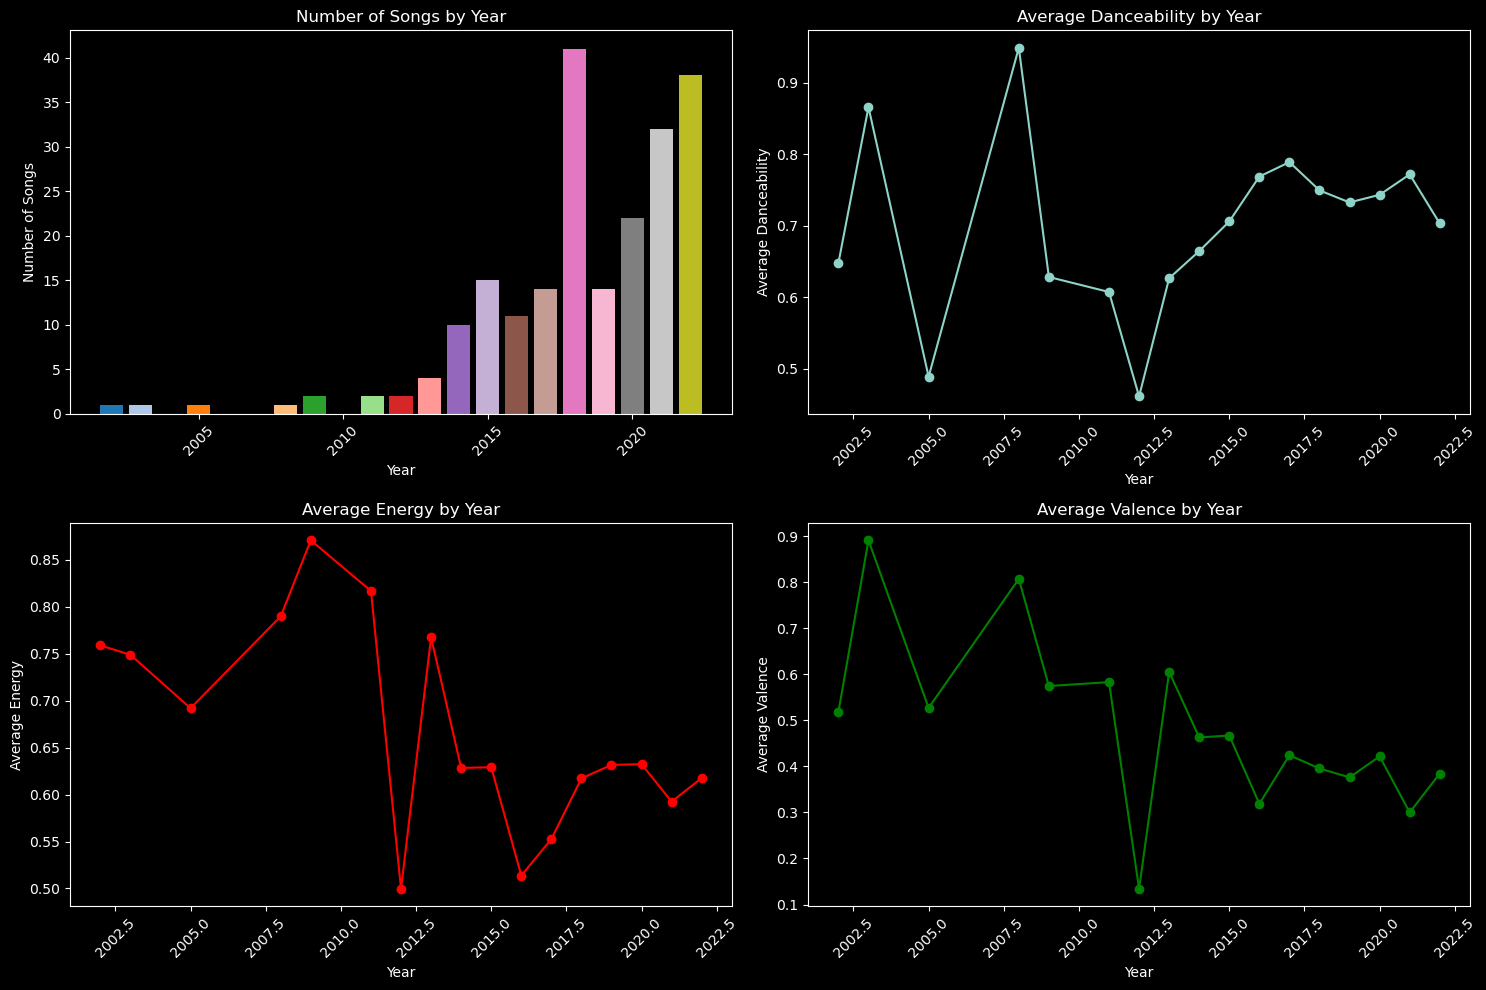


Summary statistics by year:
      Average Danceability  Average Energy  Average Valence  Number of Songs
year                                                                        
2002                 0.648           0.759            0.518                1
2003                 0.866           0.749            0.891                1
2005                 0.489           0.692            0.527                1
2008                 0.949           0.790            0.807                1
2009                 0.629           0.871            0.574                2
2011                 0.607           0.817            0.583                2
2012                 0.461           0.500            0.134                2
2013                 0.627           0.768            0.605                4
2014                 0.665           0.628            0.463               10
2015                 0.706           0.629            0.467               15
2016                 0.769           0.514     

In [38]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
year_counts = matching_songs['year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values, color=plt.cm.tab20.colors)
plt.title('Number of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
yearly_danceability = matching_songs.groupby('year')['danceability'].mean()
plt.plot(yearly_danceability.index, yearly_danceability.values, marker='o')
plt.title('Average Danceability by Year')
plt.xlabel('Year')
plt.ylabel('Average Danceability')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
yearly_energy = matching_songs.groupby('year')['energy'].mean()
plt.plot(yearly_energy.index, yearly_energy.values, marker='o', color='red')
plt.title('Average Energy by Year')
plt.xlabel('Year')
plt.ylabel('Average Energy')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
yearly_valence = matching_songs.groupby('year')['valence'].mean()
plt.plot(yearly_valence.index, yearly_valence.values, marker='o', color='green')
plt.title('Average Valence by Year')
plt.xlabel('Year')
plt.ylabel('Average Valence')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\nSummary statistics by year:")
yearly_stats = matching_songs.groupby('year').agg({
    'danceability': 'mean',
    'energy': 'mean',
    'valence': 'mean',
    'track_name_x': 'count'
}).round(3)
yearly_stats.columns = ['Average Danceability', 'Average Energy', 'Average Valence', 'Number of Songs']
print(yearly_stats)


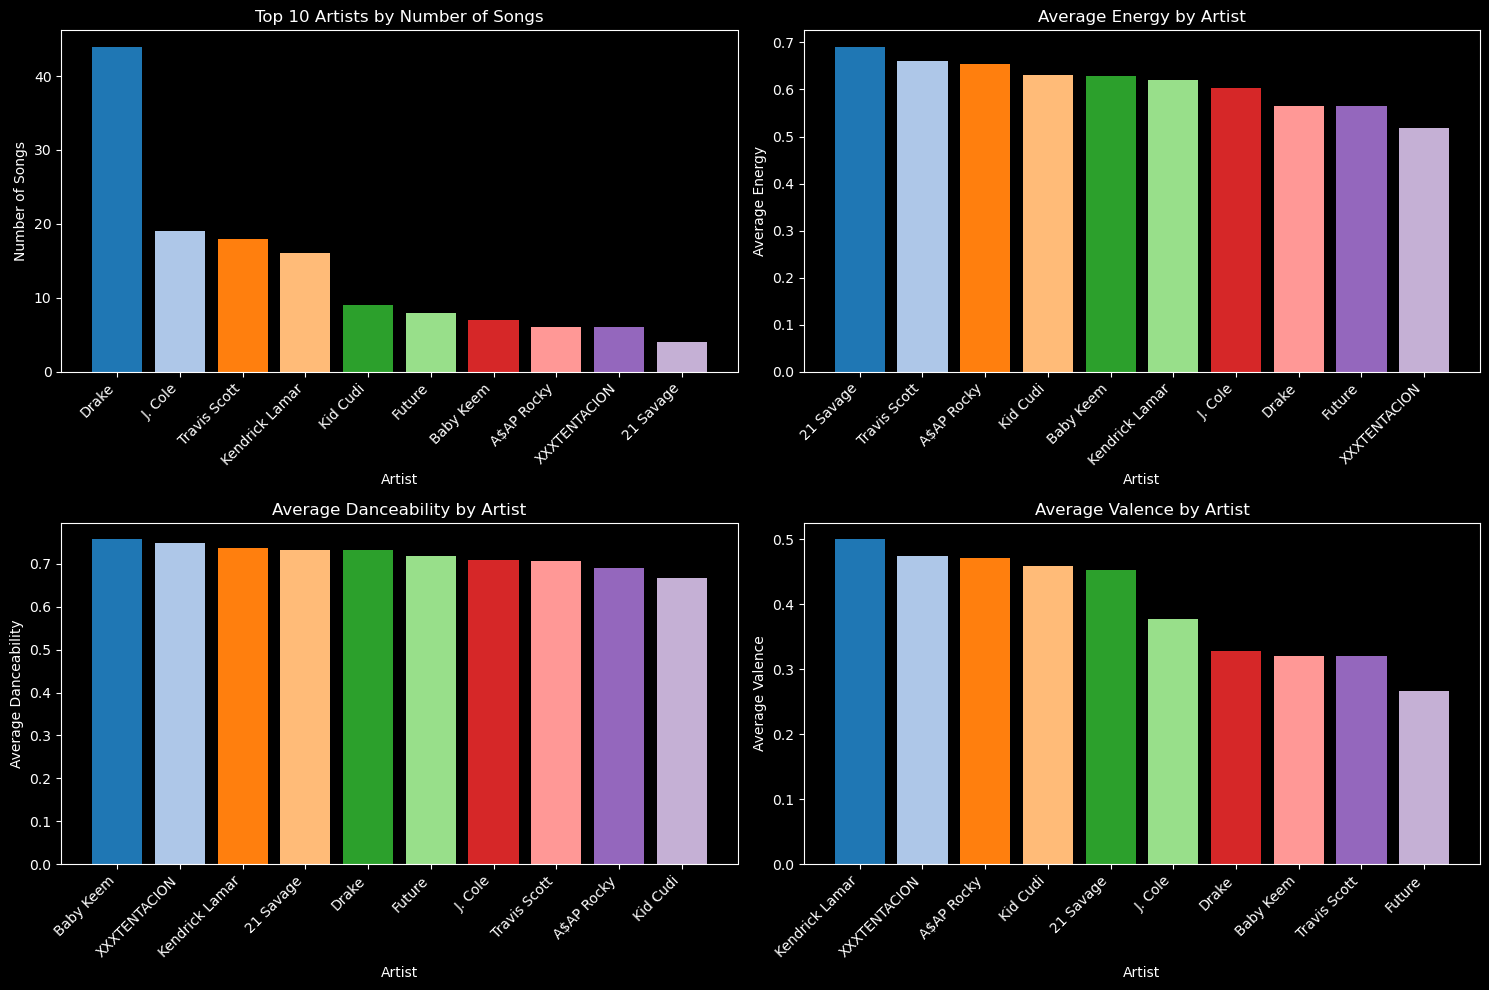


Detailed statistics for the top 10 artists with the most songs:
                Number of Songs  Average Energy  Average Danceability  \
artist_name                                                             
21 Savage                     4           0.691                 0.733   
A$AP Rocky                    6           0.654                 0.692   
Baby Keem                     7           0.630                 0.758   
Drake                        44           0.566                 0.732   
Future                        8           0.564                 0.718   
J. Cole                      19           0.603                 0.708   
Kendrick Lamar               16           0.621                 0.737   
Kid Cudi                      9           0.632                 0.667   
Travis Scott                 18           0.660                 0.706   
XXXTENTACION                  6           0.518                 0.748   

                Average Valence  Average Acousticness  
ar

In [41]:
top_artists = matching_songs['artist_name'].value_counts().head(10)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.bar(top_artists.index, top_artists.values, color=plt.cm.tab20.colors)
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
artist_energy = matching_songs[matching_songs['artist_name'].isin(top_artists.index)].groupby('artist_name')['energy'].mean().sort_values(ascending=False)
plt.bar(artist_energy.index, artist_energy.values, color=plt.cm.tab20.colors)
plt.title('Average Energy by Artist')
plt.xlabel('Artist')
plt.ylabel('Average Energy')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 3)
artist_dance = matching_songs[matching_songs['artist_name'].isin(top_artists.index)].groupby('artist_name')['danceability'].mean().sort_values(ascending=False)
plt.bar(artist_dance.index, artist_dance.values, color=plt.cm.tab20.colors)
plt.title('Average Danceability by Artist')
plt.xlabel('Artist')
plt.ylabel('Average Danceability')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 4)
artist_valence = matching_songs[matching_songs['artist_name'].isin(top_artists.index)].groupby('artist_name')['valence'].mean().sort_values(ascending=False)
plt.bar(artist_valence.index, artist_valence.values, color=plt.cm.tab20.colors)
plt.title('Average Valence by Artist')
plt.xlabel('Artist')
plt.ylabel('Average Valence')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\nDetailed statistics for the top 10 artists with the most songs:")
artist_stats = matching_songs[matching_songs['artist_name'].isin(top_artists.index)].groupby('artist_name').agg({
    'track_name_x': 'count',
    'energy': 'mean',
    'danceability': 'mean',
    'valence': 'mean',
    'acousticness': 'mean'
}).round(3)
artist_stats.columns = ['Number of Songs', 'Average Energy', 'Average Danceability', 'Average Valence', 'Average Acousticness']
print(artist_stats)


In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 
            'valence', 'tempo']

scaler = StandardScaler()
scaler.fit(kaggle_df[features].dropna())

top_artists = matching_songs['artist_name'].value_counts().head(3).index.tolist()
user_audio_vector = scaler.transform(matching_songs[features]).mean(axis=0).reshape(1, -1)

artist_recs = pd.DataFrame()

for artist in top_artists:
    pool = kaggle_df[kaggle_df['artist_name'] == artist].dropna(subset=features)
    if pool.empty:
        continue

    pool_scaled = scaler.transform(pool[features])
    pool['similarity'] = cosine_similarity(user_audio_vector, pool_scaled)[0]
    top_songs = pool.sort_values('similarity', ascending=False).head(4)
    artist_recs = pd.concat([artist_recs, top_songs])

artist_recs = artist_recs[~artist_recs['track_id'].isin(matching_songs['track_id'])]

artist_recs = artist_recs.drop_duplicates(subset='track_id').sort_values('similarity', ascending=False).head(10)

genre_ratio = matching_songs['genre'].value_counts(normalize=True)
genre_counts = (genre_ratio * 10).round().astype(int)

song_recs = pd.DataFrame()

for genre, count in genre_counts.items():
    if count == 0:
        continue
    pool = kaggle_df[(kaggle_df['genre'] == genre) & (~kaggle_df['track_id'].isin(artist_recs['track_id']))]
    pool = pool.dropna(subset=features)
    if pool.empty:
        continue

    pool_scaled = scaler.transform(pool[features])
    pool['similarity'] = cosine_similarity(user_audio_vector, pool_scaled)[0]
    top_songs = pool.sort_values('similarity', ascending=False).head(count)
    song_recs = pd.concat([song_recs, top_songs])

song_recs = song_recs[~song_recs['track_id'].isin(matching_songs['track_id'])]

song_recs = song_recs.drop_duplicates(subset='track_id').sort_values('similarity', ascending=False).head(10)

print("\n🎵 Recommended Songs Based on Your Favorite Artists:\n")
print(artist_recs[['track_name', 'artist_name', 'genre']].reset_index(drop=True))

print("\n🎶 Songs Similar to the Ones You Listened To (Genre + AUDIO):\n")
print(song_recs[['track_name', 'artist_name', 'genre']].reset_index(drop=True))




🎵 Recommended Songs Based on Your Favorite Artists:

                                          track_name   artist_name    genre
0                                          Big Rings         Drake  hip-hop
1                     3500 (feat. Future & 2 Chainz)  Travis Scott    house
2                                           Portland         Drake  hip-hop
3                              Jumbotron Shit Poppin         Drake  hip-hop
4  FRANCHISE (feat. Future, Young Thug & M.I.A.) ...  Travis Scott    house
5                                  beibs in the trap  Travis Scott    house
6                                 Land Of The Snakes       J. Cole  hip-hop
7                                   Lion King On Ice       J. Cole  hip-hop
8                                        Niggaz Know       J. Cole  hip-hop
9                                         Photograph       J. Cole  hip-hop

🎶 Songs Similar to the Ones You Listened To (Genre + AUDIO):

                                          track

In [ ]:
#https://open.spotify.com/playlist/61VCTomC7TkSkFakJvSFyz?si=ee80b423df39432b